# Loading libraries

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the dataset

In [115]:
# Define column names for the dataset
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'country', 'income']
# Load training and test data
train_data = pd.read_csv('adult.data', names=columns, sep=r',\s', engine='python')
test_data = pd.read_csv('adult.test', names=columns, sep=r',\s', engine='python', skiprows=1)

# Step 2: Output the structure of the dataset

In [116]:
print("Train Data Structure:")
print(train_data.info())
train_data.head()
train_data.describe()

Train Data Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [117]:
print("Test Data Structure:")
print(test_data.info())
test_data.head()
test_data.describe()

Test Data Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education_num   16281 non-null  int64 
 5   marital_status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital_gain    16281 non-null  int64 
 11  capital_loss    16281 non-null  int64 
 12  hours_per_week  16281 non-null  int64 
 13  country         16281 non-null  object
 14  income          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB
None


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


# Step 3: Clean the dataset, handle the missing values and encode the categorical values

In [118]:
# Replace "?" with NaN for missing values
train_data.replace('?', pd.NA, inplace=True)
test_data.replace('?', pd.NA, inplace=True)

# Handle missing values by dropping rows with NaN
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

# Modifying 'income' column to remove periods
train_data['income'] = train_data['income'].str.strip()
test_data['income'] = test_data['income'].str.replace(r'\.', '', regex=True).str.strip()

# Encode categorical features
categorical_columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship',
                       'race', 'sex', 'country', 'income']
label_enc = LabelEncoder()
for i in categorical_columns:
    train_data[i] = label_enc.fit_transform(train_data[i].astype(str))
    test_data[i] = label_enc.transform(test_data[i].astype(str))

In [119]:
# Check the cleaned data
print("\nCleaned Train Data:")
train_data.head()


Cleaned Train Data:


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [120]:
print("\nCleaned Test Data:")
test_data.head()


Cleaned Test Data:


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,38,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,38,0


# Step 4: Explore the data (Visualizations)

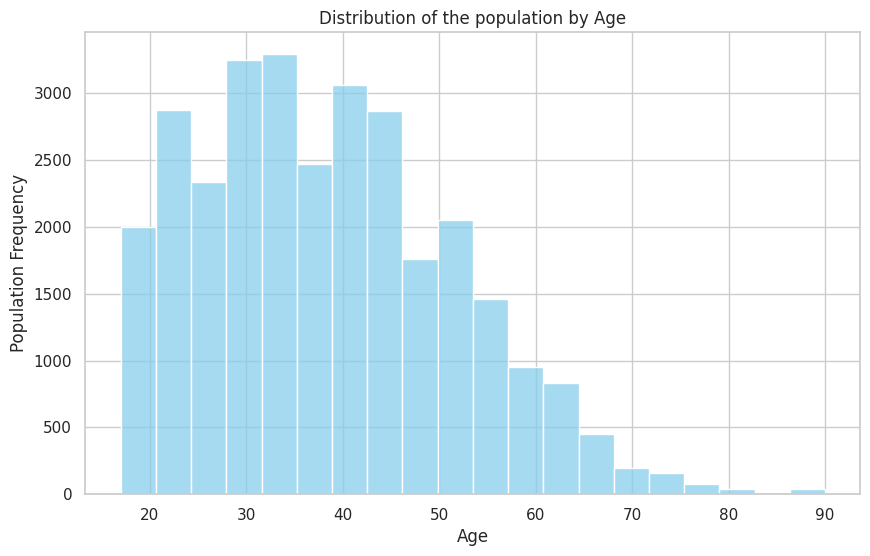

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


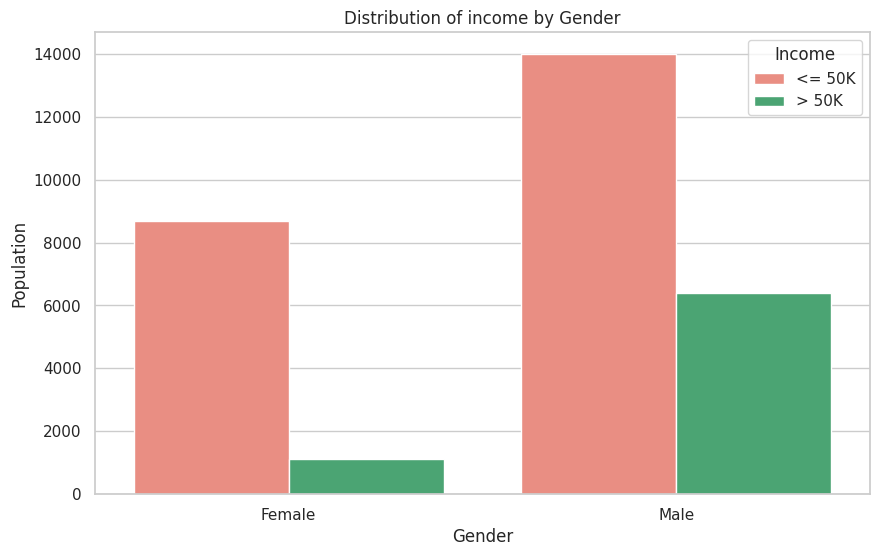

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

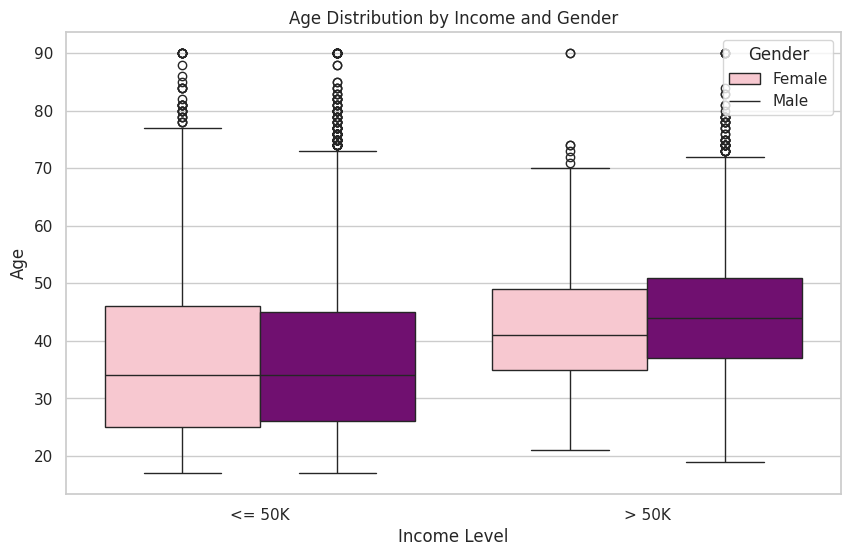

In [121]:
# 1. Distribution of Age in the Dataset
plt.figure(figsize=(10, 6))
sns.histplot(train_data['age'], bins=20, color='skyblue')
plt.title('Distribution of the population by Age')
plt.xlabel('Age')
plt.ylabel('Population Frequency')
plt.show()

# 2. Distribution of Income by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='income', data=train_data, palette=['salmon', 'mediumseagreen'])
plt.title('Distribution of income by Gender')
plt.xlabel('Gender')
plt.ylabel('Population')
plt.xticks([0, 1], ['Female', 'Male'])
plt.legend(title="Income", labels=['<= 50K', '> 50K'])
plt.show()

# 3. Box Plot of Age by Income and Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='age', hue='sex', data=train_data, palette=['pink', 'purple'], dodge=True)
plt.title('Age Distribution by Income and Gender')
plt.xlabel('Income Level')
plt.ylabel('Age')
plt.xticks([0, 1], ['<= 50K', '> 50K'])
plt.legend(title='Gender', labels=['Female', 'Male'], loc='upper right')
plt.show()

# Step 5: Apply predictive modeling

In [123]:
# Split features and target variable
X_train = train_data.drop('income', axis=1)
Y_train = train_data['income']
X_test = test_data.drop('income', axis=1)
Y_test = test_data['income']

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, Y_train)

# Predict on the test set
Y_predicted = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_predicted)
print(f"Test Accuracy whether an individual earns more than $50K a year: {accuracy * 100:.2f}%")

Test Accuracy whether an individual earns more than $50K a year: 85.08%
